#### **Project Aim**: The goal is to build a Machine Learning model that can predict whether a loan application will be approved or rejected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("C:/Users/pc/Desktop/python-ML project files/loan prediction ML/loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(381, 13)

In [6]:
df.describe() # We have 5 numerical features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.select_dtypes(include='object') # We have 6 categorical input features + 1 categorical target.(loan_ID is not a feature)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
3,LP001008,Male,No,0,Graduate,No,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,Rural,Y
378,LP002978,Female,No,0,Graduate,No,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,Rural,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


#### DATA PREPROCESSING

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
## Drop unnessary columns (Loan_ID is not a feature rather an identifier column and should be dropped)
df = df.drop('Loan_ID' , axis = 1)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
## How to handle each column with missing value

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [14]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])

In [15]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [17]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


### Exploratory Data Analysis (EDA)

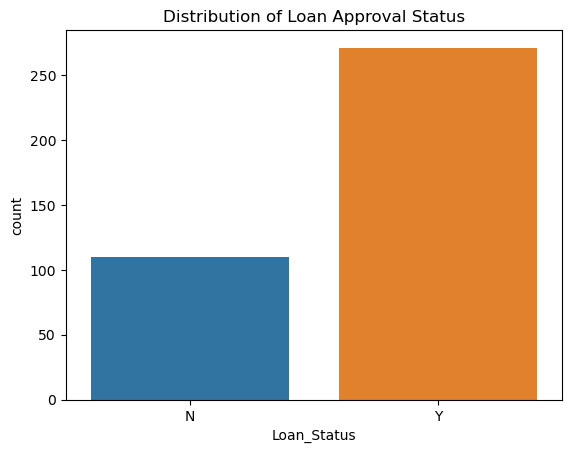

In [20]:
## Target Variable Analysis (Loan Status)
# This shows the distribution of Approved (Y) vs Not Approved (N)

sns.countplot(data=df, x='Loan_Status', hue='Loan_Status', legend=False)
plt.title('Distribution of Loan Approval Status')
plt.show()

Text(0.5, 1.0, 'Loan Approval by Credit History')

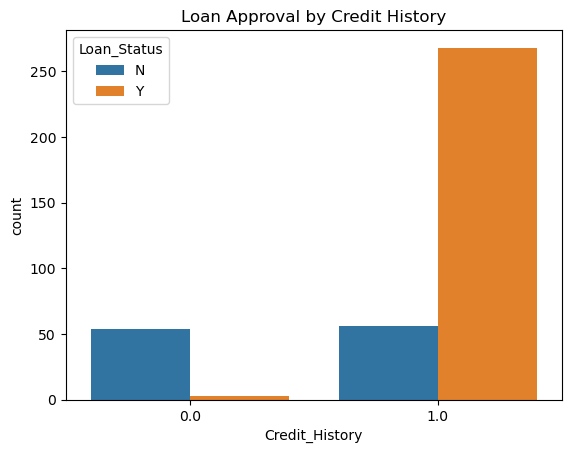

In [21]:
### Credit History vs Loan Status

sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title("Loan Approval by Credit History")

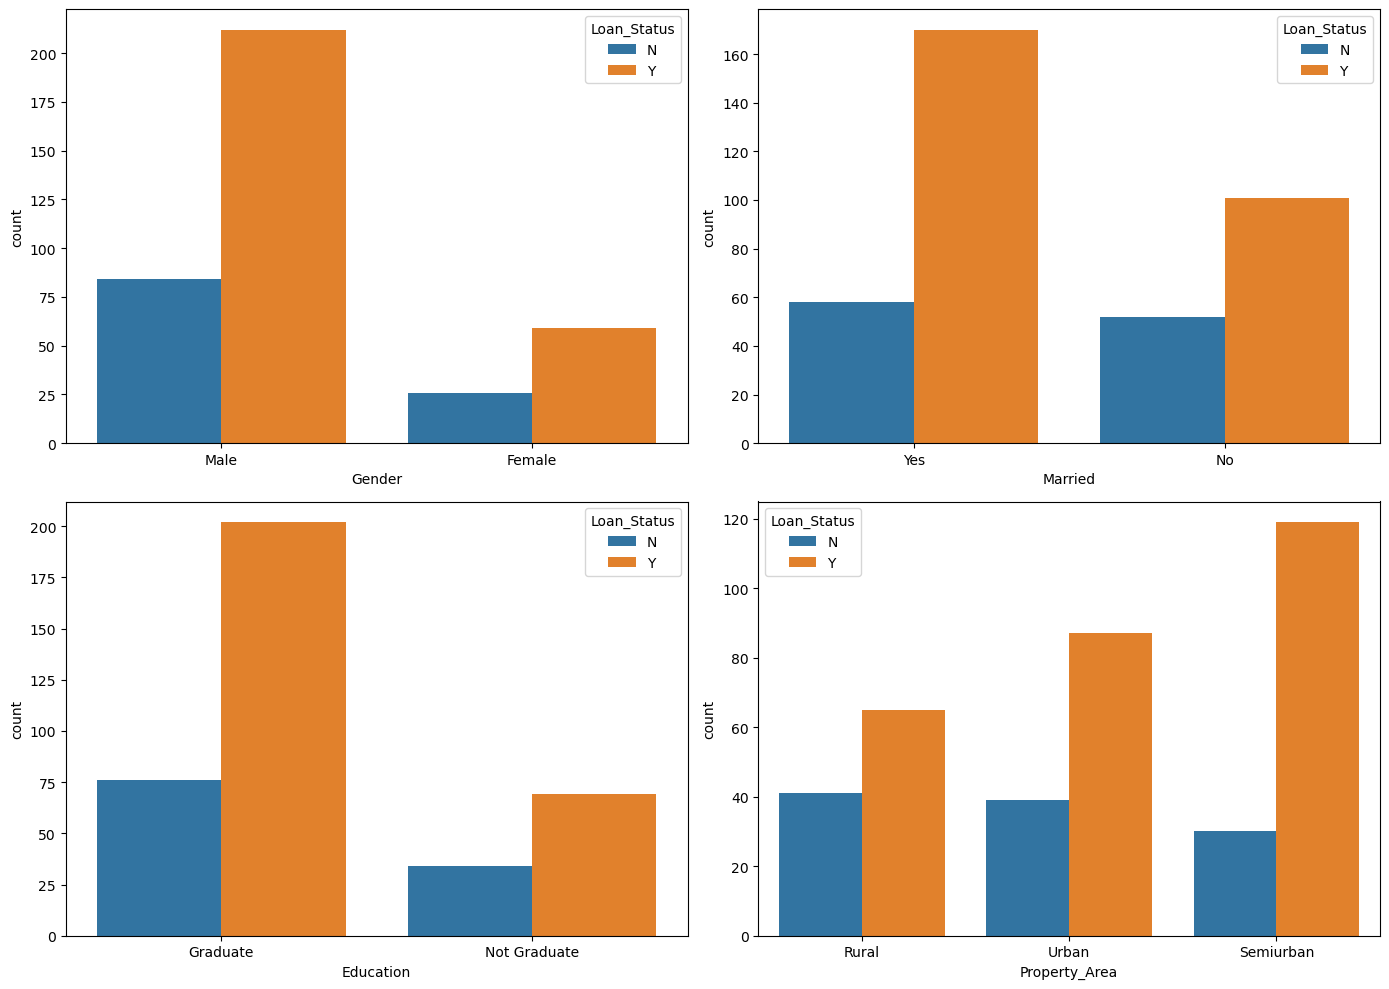

In [22]:
#  Visualize Categorical Features vs Loan Status
# This helps identify which factors (like Credit History or Education) influence approval

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(ax=axes[0, 0], data=df, x='Gender', hue='Loan_Status')
sns.countplot(ax=axes[0, 1], data=df, x='Married', hue='Loan_Status')
sns.countplot(ax=axes[1, 0], data=df, x='Education', hue='Loan_Status')
sns.countplot(ax=axes[1, 1], data=df, x='Property_Area', hue='Loan_Status')

plt.tight_layout()
plt.show()

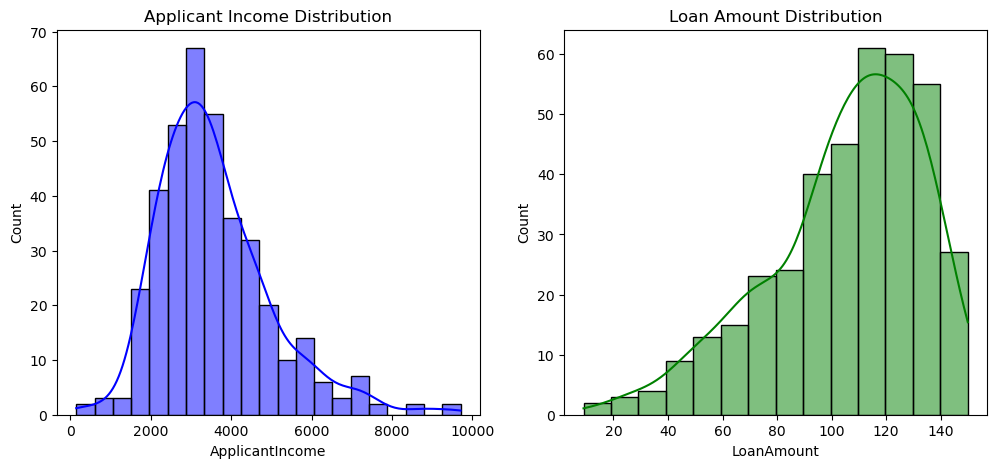

In [23]:
#  Numerical Data Distribution
# Visualizing income and loan amounts to check for outliers

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['LoanAmount'], kde=True, color='green')
plt.title('Loan Amount Distribution')

plt.show()

#### Correlation Heatmap

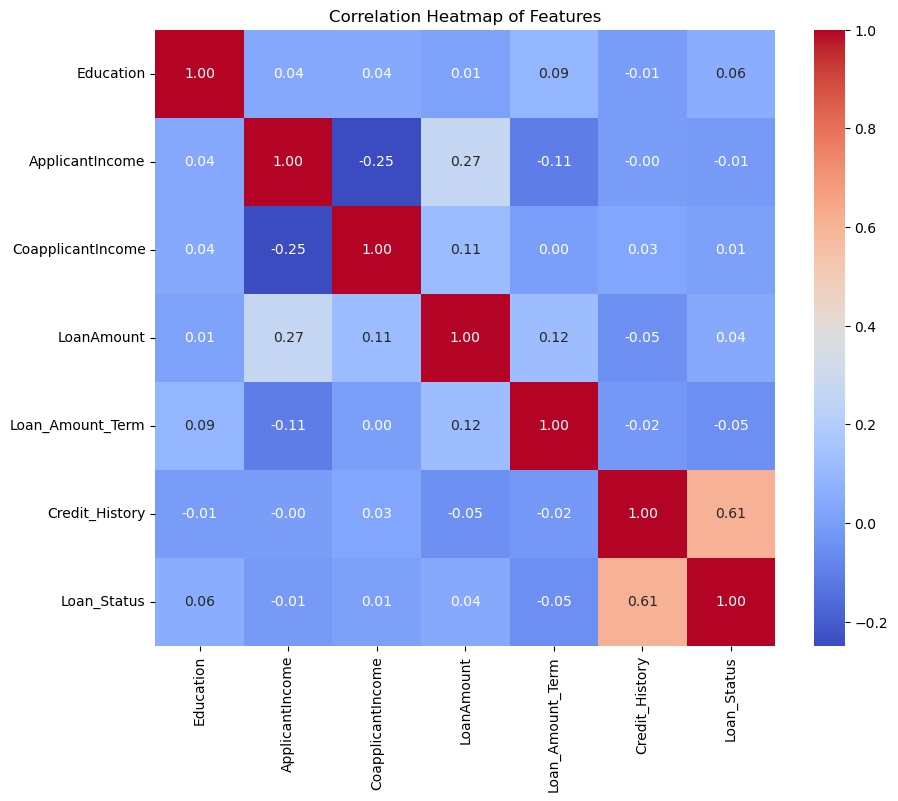

In [24]:
# First, we need to convert categorical text to numbers temporarily for the heatmap
# so that we can see Loan_status and Education on the Heatmap

df_encoded = df.copy()  
# Simple mapping for visualization purposes
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})
df_encoded['Education'] = df_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Select only numerical columns for correlation
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

##### The correlation heatmap reveals a strong positive correlation (0.61) between Credit History and Loan Status. This indicates that applicants 
##### with a good credit history are significantly more likely to have their loans approved. Other features like Applicant Income showed a moderate
##### correlation with Loan Amount, while most other variables showed independent relationships

In [25]:
for col in ['Gender', 'Dependents']:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Dependents: ['1' '0' '2' '3+']


In [26]:
df['Dependents'] = df['Dependents'].replace('3+', '4')

In [27]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [28]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

#### Manual Encoding

In [29]:
## Manual Encoding

encoding = {
    'Gender': {'Male':1 , 'Female': 0}, 
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0':0, '1':1, '2': 2, '4': 4},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}


In [30]:
## Applying the encoding

df = df.replace(encoding)
df = df.infer_objects(copy=False)

C:\Users\pc\AppData\Local\Temp\ipykernel_22392\1734003500.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encoding)


#### One-hot encoding

In [31]:
## One-hot encode ONLY Property_Area

df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

##### I manually encoded ordinal and binary categorical variables, and used one-hot encoding for nominal features
##### like property_area to avoid introducing artificial order.

In [32]:
df[['Property_Area_Semiurban', 'Property_Area_Urban']] = (
    df[['Property_Area_Semiurban', 'Property_Area_Urban']].astype(int)
)

In [33]:
df.filter(like='Property_Area').head()

,Property_Area_Semiurban,Property_Area_Urban
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   381 non-null    int64  
 1   Married                  381 non-null    int64  
 2   Dependents               381 non-null    int64  
 3   Education                381 non-null    int64  
 4   Self_Employed            381 non-null    int64  
 5   ApplicantIncome          381 non-null    int64  
 6   CoapplicantIncome        381 non-null    float64
 7   LoanAmount               381 non-null    float64
 8   Loan_Amount_Term         381 non-null    float64
 9   Credit_History           381 non-null    float64
 10  Loan_Status              381 non-null    int64  
 11  Property_Area_Semiurban  381 non-null    int64  
 12  Property_Area_Urban      381 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 38.8 KB


### Features and Target Definition

In [35]:
### Define features and target

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

### Train–test split

In [36]:
## Train–test split (with stratification)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# I use stratify=y during train-test split to preserve the target class distribution across training and test sets,
# which is especially important for imbalanced classification problems like loan approval

In [37]:
### Identify numerical columns (after one-hot encoding)

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

### Pipeline Building

In [38]:
## Build pipeline

def build_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

###  Model Evaluation

In [39]:
# Model Evaluation

def evaluate_model(model):
    pipeline = build_pipeline(model)

    pipeline.fit(X_train[num_cols], y_train)
    y_pred = pipeline.predict(X_test[num_cols])

    accuracy = accuracy_score(y_test, y_pred)

    cross_val = cross_val_score(
        pipeline,
        X_train[num_cols],
        y_train,
        cv=5
    )

    avg_cv = cross_val.mean()
    print(f"{model.__class__.__name__} - Accuracy: {accuracy:.2f}, CV: {avg_cv:.2f}")
    return avg_cv

### Models

In [40]:
# Models
models = [
    LogisticRegression(max_iter=1000),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier()
]

model_score = {
    model.__class__.__name__: evaluate_model(model)
    for model in models
}

LogisticRegression - Accuracy: 0.86, CV: 0.83
SVC - Accuracy: 0.86, CV: 0.84
DecisionTreeClassifier - Accuracy: 0.81, CV: 0.75
RandomForestClassifier - Accuracy: 0.87, CV: 0.83
GradientBoostingClassifier - Accuracy: 0.86, CV: 0.83


### Hyperparameter Tuning
###### Hyperparameter tuning for Logistic Regression

In [41]:
### I built a Logistic Regression pipeline and performed hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation. 
### I optimized the regularization parameter C over a wide logarithmic range and selected the best-performing model based on cross-validation results


log_reg_pipeline = build_pipeline(LogisticRegression(max_iter=1000))

log_reg_grid = {
    'model__C': np.logspace(-4, 4, 20),
    'model__solver': ['liblinear']
}

log_reg_search = RandomizedSearchCV(
    log_reg_pipeline,
    log_reg_grid,
    cv=5,
    n_iter=20,
    random_state=42,
    n_jobs=-1
)

log_reg_search.fit(X_train[num_cols], y_train)

best_log_reg = log_reg_search.best_estimator_


###### Hyperparameter tuning for SVM

In [42]:
### Creating an SVM model,Putting it inside a pipeline,Performing hyperparameter tuning using RandomizedSearchCV

svc_pipeline = build_pipeline(svm.SVC())

svc_grid = {
    'model__C': [0.25, 0.5, 0.75, 1],
    'model__kernel': ['linear']
}

svc_search = RandomizedSearchCV(
    svc_pipeline,
    svc_grid,
    cv=5,
    n_iter=4,
    random_state=42,
    n_jobs=-1
)

svc_search.fit(X_train[num_cols], y_train)

best_svc = svc_search.best_estimator_


###### Hyperparameter tuning for Random Forest

In [43]:
## Random Forest (NoScaler)
#### We usually don’t scale features for Random Forest because it is a tree-based model, 
#### and tree-based models do not rely on distance calculations, It only cares about the relative order of values, not their magnitude.

rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

rf_grid = {
    'model__n_estimators': np.arange(100, 1000, 100),
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 20],
    'model__min_samples_leaf': [1, 2, 5]
}

rf_search = RandomizedSearchCV(
    rf_pipeline,
    rf_grid,
    cv=5,
    n_iter=20,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_


### Final model

In [44]:
## Choose final model and save

final_model = best_rf
joblib.dump(final_model, 'loan_status_predictor.pkl')

['loan_status_predictor.pkl']

### Prediction System

In [45]:
## Prediction System

loaded_model = joblib.load('loan_status_predictor.pkl')

# Create the sample data with the correct feature names
sample_data = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [2889],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [45],
    'Loan_Amount_Term': [180],
    'Credit_History': [1], # Replace 'Property_Area' with one-hot encoded columns
    'Property_Area_Semiurban': [1],
    'Property_Area_Urban': [0]
    
})

prediction = loaded_model.predict(sample_data)

result = "Loan Approved" if prediction[0] == 1 else "Loan Not Approved"
print(f"Prediction Result: {result}")


Prediction Result: Loan Approved
